In [1]:
!pip install pycountry
import plotly.express as px
import pycountry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.9 MB/s eta 0:00:00


In [2]:
df_QPSD = pd.read_csv('/content/Quarterlypublicdebt.csv')
df_QPSD.head()

,Country Name,Country Code,Series Name,Series Code,2021Q1 [YR2021Q1],2021Q2 [YR2021Q2],2021Q3 [YR2021Q3],2021Q4 [YR2021Q4],2022Q1 [YR2022Q1],2022Q2 [YR2022Q2],2022Q3 [YR2022Q3],2022Q4 [YR2022Q4],2023Q1 [YR2023Q1],2023Q2 [YR2023Q2],2023Q3 [YR2023Q3],2023Q4 [YR2023Q4]
0,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.Z1,..,..,..,..,..,..,..,..,..,..,..,..
1,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC,..,..,..,..,..,..,..,..,..,..,..,..
2,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.CD,..,..,..,..,..,..,..,..,..,..,..,..
3,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC.Z1,..,..,..,..,..,..,..,..,..,..,..,..
4,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC,..,..,..,..,..,..,..,..,..,..,..,..


In [3]:
df_QPSD.info()
missing_values_QPSD = df_QPSD.isnull().sum()
missing_values_QPSD

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59789 entries, 0 to 59788
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country Name       59786 non-null  object
 1   Country Code       59784 non-null  object
 2   Series Name        59784 non-null  object
 3   Series Code        59784 non-null  object
 4   2021Q1 [YR2021Q1]  59784 non-null  object
 5   2021Q2 [YR2021Q2]  59784 non-null  object
 6   2021Q3 [YR2021Q3]  59784 non-null  object
 7   2021Q4 [YR2021Q4]  59784 non-null  object
 8   2022Q1 [YR2022Q1]  59784 non-null  object
 9   2022Q2 [YR2022Q2]  59784 non-null  object
 10  2022Q3 [YR2022Q3]  59784 non-null  object
 11  2022Q4 [YR2022Q4]  59784 non-null  object
 12  2023Q1 [YR2023Q1]  59784 non-null  object
 13  2023Q2 [YR2023Q2]  59784 non-null  object
 14  2023Q3 [YR2023Q3]  59784 non-null  object
 15  2023Q4 [YR2023Q4]  59784 non-null  object
dtypes: object(16)
memory usage: 7.3+ MB


,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
2021Q1 [YR2021Q1],5
2021Q2 [YR2021Q2],5
2021Q3 [YR2021Q3],5
2021Q4 [YR2021Q4],5
2022Q1 [YR2022Q1],5
2022Q2 [YR2022Q2],5


In [4]:
rows_with_missing_QPSD = df_QPSD[df_QPSD.isnull().any(axis=1)]
rows_with_missing_QPSD

,Country Name,Country Code,Series Name,Series Code,2021Q1 [YR2021Q1],2021Q2 [YR2021Q2],2021Q3 [YR2021Q3],2021Q4 [YR2021Q4],2022Q1 [YR2022Q1],2022Q2 [YR2022Q2],2022Q3 [YR2022Q3],2022Q4 [YR2022Q4],2023Q1 [YR2023Q1],2023Q2 [YR2023Q2],2023Q3 [YR2023Q3],2023Q4 [YR2023Q4]
59784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59787,Data from database: Quarterly Public Sector Debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59788,Last Updated: 04/23/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_QPSD_cleaned = df_QPSD.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])
df_QPSD_cleaned.shape

(59784, 16)

In [6]:
df_SPI = pd.read_csv('/content/Statisticalperformanceindicators.csv')
df_SPI.head()

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Agriculture census (Availability score over 20...,SPI.D4.1.2.AGRI,0.5,0.5,0.5
1,Afghanistan,AFG,Agriculture survey (Availability score over 10...,SPI.D4.1.5.AGSVY,0.33,0.67,0.67
2,Afghanistan,AFG,Availability of Comparable Poverty headcount r...,SPI.D1.5.POV,0,0,0
3,Afghanistan,AFG,"Availability of Mortality rate, under-5 (per 1...",SPI.D1.5.CHLD.MORT,1,1,1
4,Afghanistan,AFG,Business process,SPI.D5.2.10.GSBP,0,0,0


In [7]:
df_SPI.info()
missing_values_SPI = df_SPI.isnull().sum()
missing_values_SPI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15629 entries, 0 to 15628
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   15626 non-null  object
 1   Country Code   15624 non-null  object
 2   Series Name    15624 non-null  object
 3   Series Code    15624 non-null  object
 4   2021 [YR2021]  15624 non-null  object
 5   2022 [YR2022]  15624 non-null  object
 6   2023 [YR2023]  15624 non-null  object
dtypes: object(7)
memory usage: 854.8+ KB


,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
2021 [YR2021],5
2022 [YR2022],5
2023 [YR2023],5


In [8]:
rows_with_missing_SPI = df_SPI[df_SPI.isnull().any(axis=1)]
rows_with_missing_SPI

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
15624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15627,Data from database: Statistical Performance In...,NaN,NaN,NaN,NaN,NaN,NaN
15628,Last Updated: 11/11/2024,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_SPI_cleaned = df_SPI.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])
df_SPI_cleaned.shape

(15624, 7)

In [10]:
df_WDI = pd.read_csv('/content/Worlddevelopmentindicators.csv')
df_WDI.head()

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..
1,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,..,..,..
2,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,..,..,..
3,Bermuda,BMU,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100
4,Bermuda,BMU,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,100,100,100


In [11]:
df_WDI.info()
missing_values_WDI = df_WDI.isnull().sum()
missing_values_WDI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327458 entries, 0 to 327457
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Country Name   327455 non-null  object
 1   Country Code   327453 non-null  object
 2   Series Name    327453 non-null  object
 3   Series Code    327453 non-null  object
 4   2021 [YR2021]  327453 non-null  object
 5   2022 [YR2022]  327453 non-null  object
 6   2023 [YR2023]  327453 non-null  object
dtypes: object(7)
memory usage: 17.5+ MB


,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
2021 [YR2021],5
2022 [YR2022],5
2023 [YR2023],5


In [12]:
rows_with_missing_WDI = df_WDI[df_WDI.isnull().any(axis=1)]
rows_with_missing_WDI

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
327453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327456,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN
327457,Last Updated: 04/15/2025,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_WDI_cleaned = df_WDI.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])
df_WDI_cleaned.shape

(327453, 7)

In [14]:
df_SPI_cleaned.replace('..', pd.NA, inplace=True)
df_WDI_cleaned.replace('..', pd.NA, inplace=True)
df_QPSD_cleaned.replace('..', pd.NA, inplace=True)

<ipython-input-14-af2d7f35d1bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SPI_cleaned.replace('..', pd.NA, inplace=True)
<ipython-input-14-af2d7f35d1bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WDI_cleaned.replace('..', pd.NA, inplace=True)
<ipython-input-14-af2d7f35d1bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_QPSD_cleaned.replace('..', pd.NA, inplace=True)


In [15]:
df_SPI_melted = pd.melt(
    df_SPI_cleaned,
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=['2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
    var_name='Year',
    value_name='Value'
)

df_SPI_melted['Year'] = df_SPI_melted['Year'].str.extract(r'(\d{4})').astype(int)
df_SPI_melted.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Agriculture census (Availability score over 20...,SPI.D4.1.2.AGRI,2021,0.5
1,Afghanistan,AFG,Agriculture survey (Availability score over 10...,SPI.D4.1.5.AGSVY,2021,0.33
2,Afghanistan,AFG,Availability of Comparable Poverty headcount r...,SPI.D1.5.POV,2021,0
3,Afghanistan,AFG,"Availability of Mortality rate, under-5 (per 1...",SPI.D1.5.CHLD.MORT,2021,1
4,Afghanistan,AFG,Business process,SPI.D5.2.10.GSBP,2021,0


In [16]:
df_WDI_melted = pd.melt(
    df_WDI_cleaned,
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=['2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
    var_name='Year',
    value_name='Value'
)

df_WDI_melted['Year'] = df_WDI_melted['Year'].str.extract(r'(\d{4})').astype(int)
df_WDI_melted.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2021,<NA>
1,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,2021,<NA>
2,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,2021,<NA>
3,Bermuda,BMU,Access to electricity (% of population),EG.ELC.ACCS.ZS,2021,100
4,Bermuda,BMU,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,2021,100


In [17]:
quarterly_cols = [col for col in df_QPSD_cleaned.columns if 'YR20' in col and 'Q' in col]

df_QPSD_melted = pd.melt(
    df_QPSD_cleaned,
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars = quarterly_cols,
    var_name='Quarter',
    value_name='Value'
)

df_QPSD_melted['Quarter_Formatted'] = df_QPSD_melted['Quarter'].str.extract(r'(20\d{2}Q[1-4])')
df_QPSD_melted['Year'] = df_QPSD_melted['Quarter_Formatted'].str[:4].astype(int)
df_QPSD_melted['Quarter'] = df_QPSD_melted['Quarter_Formatted'].str[-2:]

df_QPSD_melted['Value'] = pd.to_numeric(df_QPSD_melted['Value'].replace('..', pd.NA), errors='coerce')
df_QPSD_melted.drop(columns='Quarter_Formatted', inplace=True)
df_QPSD_melted.head()

,Country Name,Country Code,Series Name,Series Code,Quarter,Value,Year
0,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.Z1,Q1,NaN,2021
1,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC,Q1,NaN,2021
2,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.CD,Q1,NaN,2021
3,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC.Z1,Q1,NaN,2021
4,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC,Q1,NaN,2021


In [18]:
missing_values_QPSD= df_QPSD_melted.isnull().sum()
missing_values_QPSD

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Quarter,0
Value,528861
Year,0


In [19]:
df_QPSD_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717408 entries, 0 to 717407
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country Name  717408 non-null  object 
 1   Country Code  717408 non-null  object 
 2   Series Name   717408 non-null  object 
 3   Series Code   717408 non-null  object 
 4   Quarter       717408 non-null  object 
 5   Value         188547 non-null  float64
 6   Year          717408 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 38.3+ MB


In [20]:
df_QPSD_melted.shape

(717408, 7)

In [21]:
dataset_names = ['df_QPSD_melted', 'df_WDI_melted', 'df_SPI_melted']
existing_datasets = {name: name in globals() for name in dataset_names}
existing_datasets

{'df_QPSD_melted': True, 'df_WDI_melted': True, 'df_SPI_melted': True}

In [22]:
countries_qpsd = set(df_QPSD_melted['Country Name'].dropna().unique())
countries_wdi = set(df_WDI_melted['Country Name'].dropna().unique())
countries_spi = set(df_SPI_melted['Country Name'].dropna().unique())

common_countries_all = countries_qpsd & countries_wdi & countries_spi

len(common_countries_all), sorted(common_countries_all)

(106,
 ['Albania',
  'Argentina',
  'Armenia',
  'Australia',
  'Austria',
  'Bangladesh',
  'Barbados',
  'Belgium',
  'Bolivia',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'Bulgaria',
  'Burkina Faso',
  'Cambodia',
  'Canada',
  'Chile',
  'China',
  'Colombia',
  'Congo, Dem. Rep.',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cyprus',
  'Czechia',
  'Denmark',
  'Dominican Republic',
  'El Salvador',
  'Estonia',
  'Fiji',
  'Finland',
  'France',
  'Georgia',
  'Germany',
  'Greece',
  'Guatemala',
  'Honduras',
  'Hungary',
  'Iceland',
  'Indonesia',
  'Ireland',
  'Israel',
  'Italy',
  'Japan',
  'Kazakhstan',
  'Kenya',
  'Korea, Rep.',
  'Kosovo',
  'Kyrgyz Republic',
  'Latvia',
  'Lebanon',
  'Lesotho',
  'Lithuania',
  'Luxembourg',
  'Madagascar',
  'Malawi',
  'Malaysia',
  'Maldives',
  'Malta',
  'Mauritius',
  'Mexico',
  'Moldova',
  'Mongolia',
  'Morocco',
  'Nepal',
  'Netherlands',
  'New Zealand',
  'Nicaragua',
  'Nigeria',
  'North Macedon

In [23]:
df_QPSD_filtered = df_QPSD_melted[df_QPSD_melted['Country Name'].isin(common_countries_all)]
df_WDI_filtered = df_WDI_melted[df_WDI_melted['Country Name'].isin(common_countries_all)]
df_SPI_filtered = df_SPI_melted[df_SPI_melted['Country Name'].isin(common_countries_all)]

filtered_shapes = {
    'QPSD': df_QPSD_filtered.shape,
    'WDI': df_WDI_filtered.shape,
    'SPI': df_SPI_filtered.shape
}

filtered_shapes

{'QPSD': (717408, 7), 'WDI': (479862, 6), 'SPI': (22896, 6)}

In [24]:
df_QPSD_filtered.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Quarter,0
Value,528861
Year,0


In [25]:
df_WDI_filtered.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Year,0
Value,221445


In [26]:
df_SPI_filtered.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Year,0
Value,220


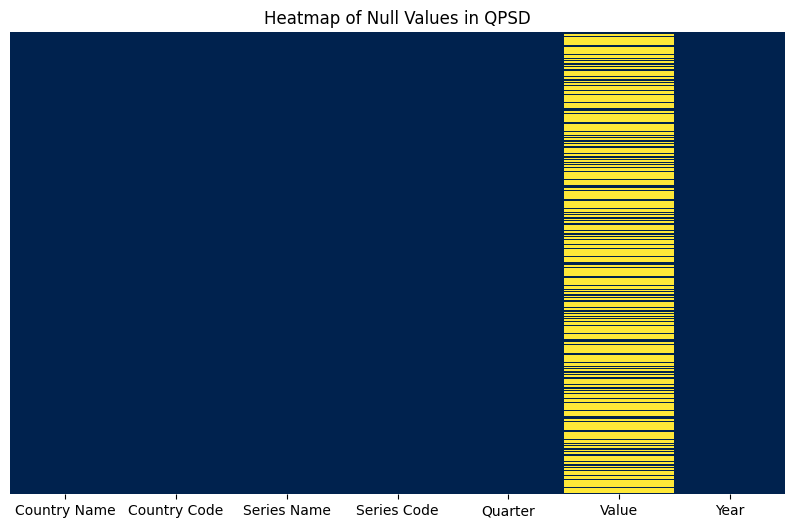

In [27]:
df_QPSD_heat = df_QPSD_filtered
plt.figure(figsize=(10, 6))
sns.heatmap(df_QPSD_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("Heatmap of Null Values in QPSD")
plt.show()

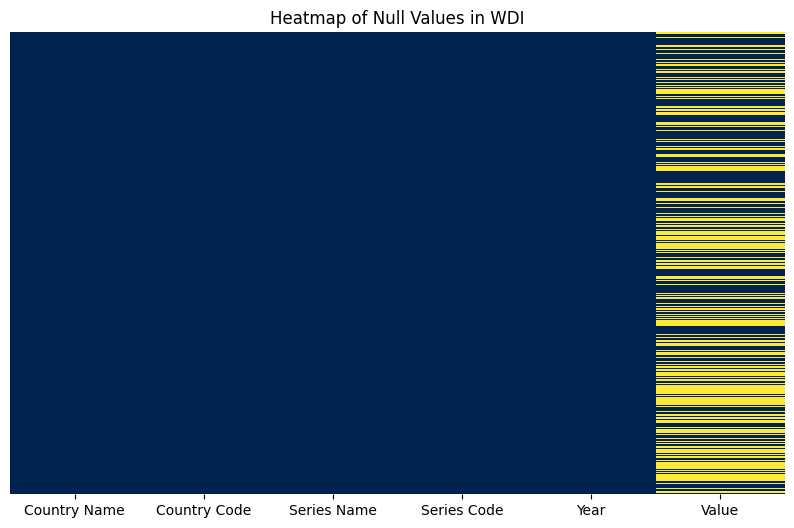

In [28]:
df_WDI_heat = df_WDI_filtered
plt.figure(figsize=(10, 6))
sns.heatmap(df_WDI_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("Heatmap of Null Values in WDI")
plt.show()


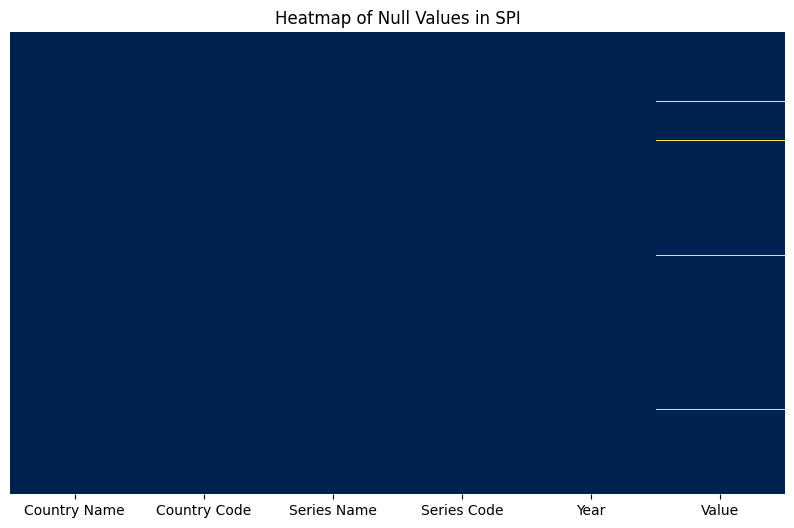

In [29]:
df_SPI_heat = df_SPI_filtered
plt.figure(figsize=(10, 6))
sns.heatmap(df_SPI_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("Heatmap of Null Values in SPI")
plt.show()

In [30]:
df_QPSD_filtered['Source'] = 'QPSD'
df_WDI_filtered['Source'] = 'WDI'
df_SPI_filtered['Source'] = 'SPI'
df_combined = pd.concat([df_QPSD_filtered, df_WDI_filtered, df_SPI_filtered], ignore_index=True)
df_combined.head()
df_combined.to_csv("/content/Combined_Indicators_Data.csv", index=False)

<ipython-input-30-b5b385a51e5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WDI_filtered['Source'] = 'WDI'
<ipython-input-30-b5b385a51e5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SPI_filtered['Source'] = 'SPI'


In [31]:
df_combined.shape

(1220166, 8)

In [32]:
df_combined.dtypes

,0
Country Name,object
Country Code,object
Series Name,object
Series Code,object
Quarter,object
Value,object
Year,int64
Source,object


In [33]:
df_combined['Value'] = pd.to_numeric(df_combined['Value'], errors='coerce')

In [34]:
df_combined.dtypes

,0
Country Name,object
Country Code,object
Series Name,object
Series Code,object
Quarter,object
Value,float64
Year,int64
Source,object


In [35]:
df_combined['Value'] = pd.to_numeric(df_combined['Value'], errors='coerce')
df_combined['Value'].describe()

,Value
count,4.696400e+05
mean,1.175084e+13
std,2.673973e+14
min,-5.382066e+14
25%,3.500000e+00
50%,5.979355e+01
75%,3.450346e+09
max,2.089238e+16


In [36]:
unique_series = df_combined['Series Name'].dropna().unique()
df_unique_series = pd.DataFrame(sorted(unique_series), columns=["Series Name"])

In [37]:
series_sources = df_combined[['Series Name', 'Source']].dropna().drop_duplicates()
series_sources_agg = series_sources.groupby('Series Name')['Source'].agg(lambda x: ', '.join(sorted(set(x)))).reset_index()
df_unique_series_with_source = df_unique_series.merge(series_sources_agg, on='Series Name', how='left')
df_unique_series_with_source.rename(columns={'Source': 'Source File(s)'}, inplace=True)
df_unique_series_with_source.head()

,Series Name,Source File(s)
0,ARI treatment (% of children under 5 taken to ...,WDI
1,Access to clean fuels and technologies for coo...,WDI
2,Access to clean fuels and technologies for coo...,WDI
3,Access to clean fuels and technologies for coo...,WDI
4,Access to electricity (% of population),WDI


In [38]:
df_unique_series_with_source.to_csv("Unique_Series_List.csv", index=False)

In [39]:
categories = {
    'Financial_Indicators': [
        'finance', 'financial', 'bank', 'capital', 'lending', 'investment', 'credit', 'loan',
        'interest', 'deposit', 'stock', 'market', 'asset', 'insurance', 'cash', 'money',
        'monetary', 'fund', 'savings', 'bond', 'atm', 'borrowers', 'commercial bank',
        'domestic credit', 'financing', 'nonbank', 'remittance', 'account', 'expense', 'rate'
    ],
    'Statistical_Indicators': [
        'statistic', 'index', 'score', 'performance', 'ranking', 'indicator', 'rate', 'ratio',
        'measure', 'benchmark', 'coefficient', 'census', 'survey', 'assessment', 'dependency',
        'availability', 'metadata', 'evaluation', 'estimation'
    ],
    'Economical_Indicators': [
        'economic', 'gdp', 'inflation', 'trade', 'revenue', 'expenditure', 'growth', 'export',
        'import', 'income', 'tax', 'tariff', 'economy', 'business', 'enterprise', 'product',
        'consumption', 'price', 'nominal', 'real', 'ppp', 'purchasing power', 'gni', 'gnp',
        'national', 'currency', 'value added', 'industry', 'manufacturing', 'services',
        'agriculture', 'logistics', 'subsidy', 'saving', 'earned'
    ],
    'Environmental_Indicators': [
        'environment', 'carbon', 'emission', 'forest', 'sustainab', 'energy', 'waste', 'air',
        'water', 'pollut', 'climate', 'green', 'renewable', 'biodiversity', 'ecology', 'land',
        'natural resource', 'methane', 'nitrous', 'electricity', 'fuel', 'co2', 'cereal',
        'crop', 'mineral', 'fishery', 'marine', 'natural', 'tree', 'species'
    ],
    'Social_Indicators': [
        'health', 'education', 'gender', 'inequality', 'life expectancy', 'labor', 'population',
        'poverty', 'social', 'human', 'welfare', 'household', 'employment', 'unemployment',
        'birth', 'death', 'mortality', 'school', 'female', 'male', 'women', 'men', 'child',
        'youth', 'urban', 'rural', 'literacy', 'hospital', 'medical', 'disease', 'vaccine',
        'immunization', 'nutrition', 'hiv', 'aids', 'therapy', 'antiretroviral', 'sanitation',
        'refugee', 'survival', 'food', 'anemia', 'caesarean', 'marriage', 'migrant', 'people',
        'person', 'fertility', 'pregnant', 'drinking water', 'migr', 'treatment', 'living',
        'worker', 'asylum', 'internally displaced', 'prison', 'force'
    ],
    'Public_Debt_Indicators': [
        'debt', 'public debt', 'fiscal', 'deficit', 'borrow', 'budget', 'government', 'public',
        'national debt', 'sovereign debt', 'treasury', 'bond', 'grant', 'concessional',
        'official', 'ibrd', 'ida', 'imf', 'international monetary fund', 'principal',
        'repayment'
    ]
}

input_file = '/content/Unique_Series_List.csv'
output_file = '/content/Categorized_Series.csv'
output_dir = '/content/Categorized_Series'

try:
    df = pd.read_csv(input_file)
    if df.shape[1] == 1 and 'Series Name' not in df.columns:
        df.columns = ['Series Name']

    if df.iloc[0, 0].strip().lower() == 'series name':
        df = df.iloc[1:].reset_index(drop=True)

    print(f"Successfully loaded {len(df)} indicators.")
    print(df.head())

except Exception as e:
    print(f"Error loading file: {e}")
    raise


df['Category'] = 'Uncategorized'

for index, row in df.iterrows():
    series_name = row['Series Name']
    if pd.isna(series_name):
        continue

    series_lower = str(series_name).lower()
    best_category = 'Uncategorized'
    max_matches = 0

    for category, keywords in categories.items():
        matches = sum(keyword in series_lower for keyword in keywords)
        if matches > max_matches:
            max_matches = matches
            best_category = category

    df.at[index, 'Category'] = best_category


os.makedirs(output_dir, exist_ok=True)

df.to_csv(output_file, index=False)
print(f"Categorized series saved to {output_file}")

for category in df['Category'].unique():
    category_path = os.path.join(output_dir, f"{category}.csv")
    df[df['Category'] == category].to_csv(category_path, index=False)
    print(f"Created {category_path} with {len(df[df['Category'] == category])} rows")

print("\nSample indicators from each category:")
for category in df['Category'].unique():
    sample = df[df['Category'] == category]['Series Name'].sample(min(5, len(df[df['Category'] == category])), random_state=42)
    print(f"\n{category}:")
    for name in sample.tolist():
        print(f"- {name}")


Successfully loaded 2145 indicators.
                                         Series Name Source File(s)
0  ARI treatment (% of children under 5 taken to ...            WDI
1  Access to clean fuels and technologies for coo...            WDI
2  Access to clean fuels and technologies for coo...            WDI
3  Access to clean fuels and technologies for coo...            WDI
4            Access to electricity (% of population)            WDI
Categorized series saved to /content/Categorized_Series.csv
Created /content/Categorized_Series/Social_Indicators.csv with 614 rows
Created /content/Categorized_Series/Environmental_Indicators.csv with 106 rows
Created /content/Categorized_Series/Financial_Indicators.csv with 334 rows
Created /content/Categorized_Series/Economical_Indicators.csv with 813 rows
Created /content/Categorized_Series/Statistical_Indicators.csv with 99 rows
Created /content/Categorized_Series/Uncategorized.csv with 115 rows
Created /content/Categorized_Series/Public_Debt_I

In [40]:
import pandas as pd
categories_files = {
    'Economical_Indicators': '/content/Categorized_Series/Economical_Indicators.csv',
    'Environmental_Indicators': '/content/Categorized_Series/Environmental_Indicators.csv',
    'Financial_Indicators': '/content/Categorized_Series/Financial_Indicators.csv',
    'Public_Debt_Indicators': '/content/Categorized_Series/Public_Debt_Indicators.csv',
    'Social_Indicators': '/content/Categorized_Series/Social_Indicators.csv',
    'Statistical_Indicators': '/content/Categorized_Series/Statistical_Indicators.csv',
    'Uncategorized': '//content/Categorized_Series/Uncategorized.csv'
}

series_to_category = {}
for category, filepath in categories_files.items():
    df = pd.read_csv(filepath)
    for series_name in df['Series Name'].dropna().unique():
        series_to_category[series_name] = category

df_combined['Indicator Category'] = df_combined['Series Name'].map(series_to_category)
matched_count = df_combined['Indicator Category'].notna().sum()
unmatched_count = df_combined['Indicator Category'].isna().sum()
matched_count, unmatched_count

(np.int64(1220166), np.int64(0))

In [41]:
base_path = "/content/"
saved_files = {}
for category in df_combined['Indicator Category'].dropna().unique():
    category_df = df_combined[df_combined['Indicator Category'] == category]
    filename = f"{category}.csv"
    file_path = base_path + filename
    category_df.to_csv(file_path, index=False)
    saved_files[category] = file_path

saved_files

{'Financial_Indicators': '/content/Financial_Indicators.csv',
 'Economical_Indicators': '/content/Economical_Indicators.csv',
 'Public_Debt_Indicators': '/content/Public_Debt_Indicators.csv',
 'Environmental_Indicators': '/content/Environmental_Indicators.csv',
 'Social_Indicators': '/content/Social_Indicators.csv',
 'Statistical_Indicators': '/content/Statistical_Indicators.csv',
 'Uncategorized': '/content/Uncategorized.csv'}

In [42]:
df_economical=pd.read_csv('/content/Economical_Indicators.csv')
df_environmental=pd.read_csv('/content/Environmental_Indicators.csv')
df_financial=pd.read_csv('/content/Financial_Indicators.csv')
df_publicdebt=pd.read_csv('/content/Public_Debt_Indicators.csv')
df_social=pd.read_csv('/content/Social_Indicators.csv')
df_statistical=pd.read_csv('/content/Statistical_Indicators.csv')
df_uncategorized=pd.read_csv('/content/Uncategorized.csv')

<ipython-input-42-19e9dc6b45d9>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_economical=pd.read_csv('/content/Economical_Indicators.csv')


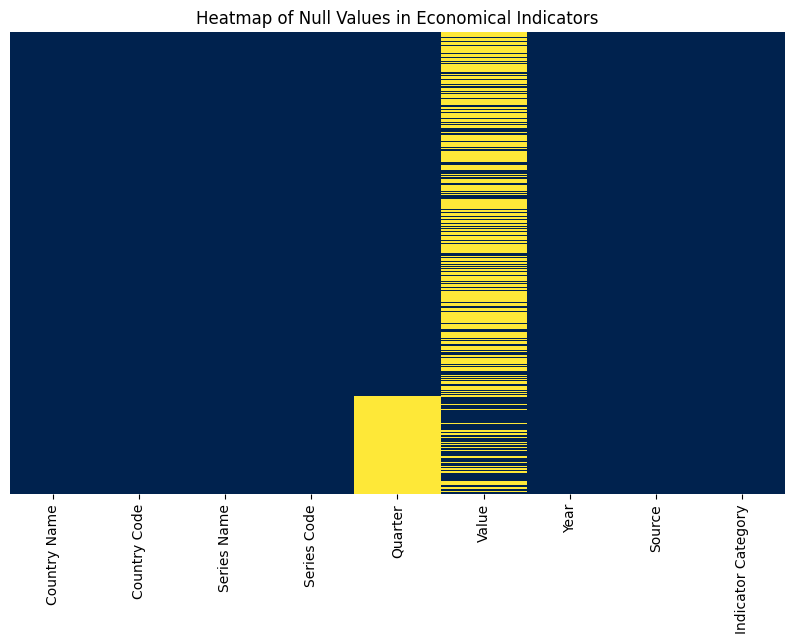

In [43]:
df_economical_heat = df_economical
plt.figure(figsize=(10, 6))
sns.heatmap(df_economical_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("Heatmap of Null Values in Economical Indicators")
plt.show()

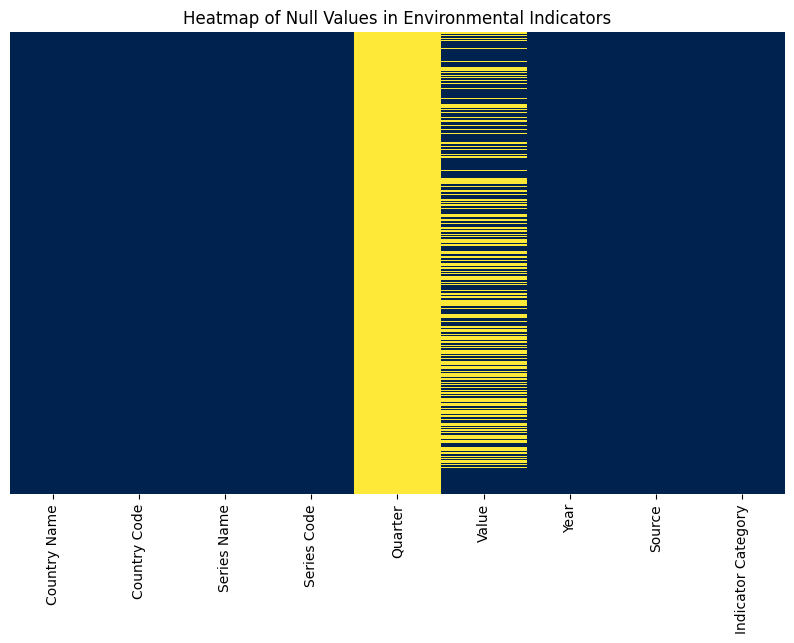

In [44]:
df_environmental_heat = df_environmental
plt.figure(figsize=(10, 6))
sns.heatmap(df_environmental_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("Heatmap of Null Values in Environmental Indicators")
plt.show()

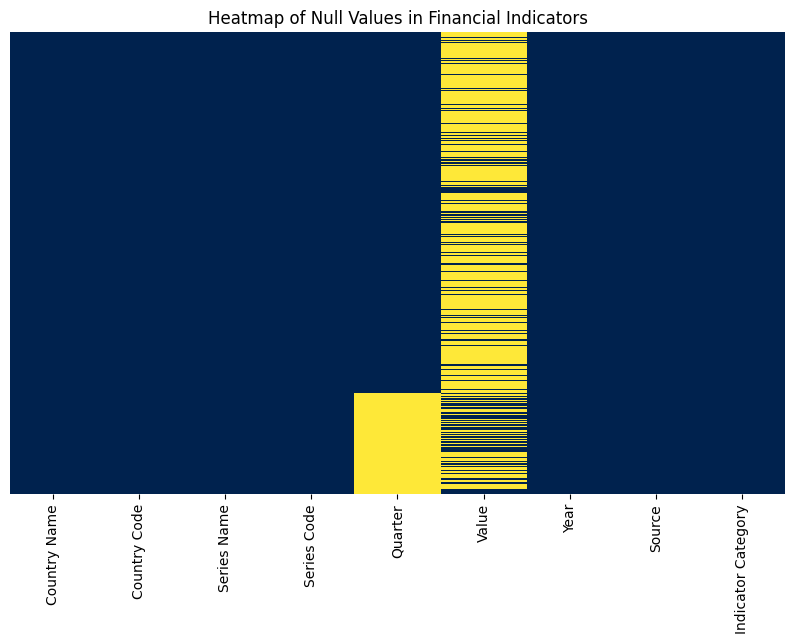

In [45]:
df_financial_heat = df_financial
plt.figure(figsize=(10, 6))
sns.heatmap(df_financial_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("Heatmap of Null Values in Financial Indicators")
plt.show()

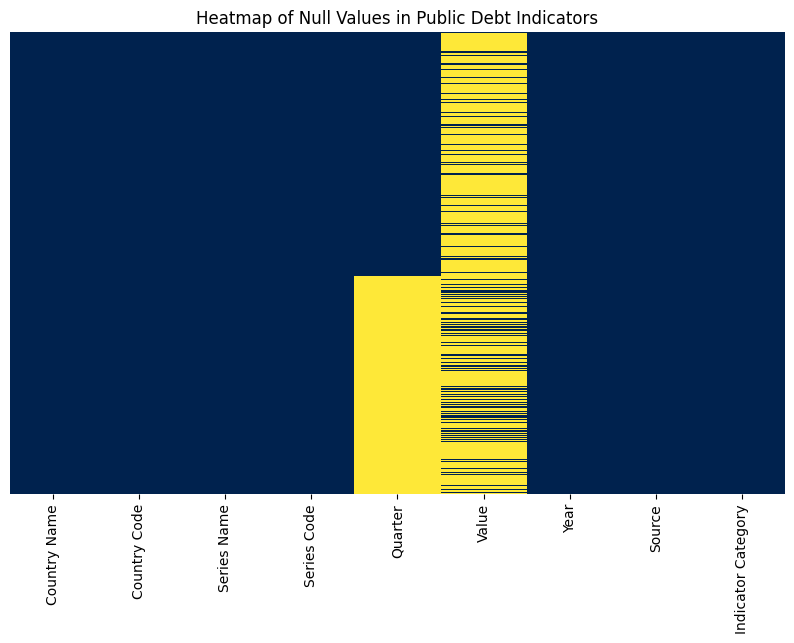

In [46]:
df_publicdebt_heat = df_publicdebt
plt.figure(figsize=(10, 6))
sns.heatmap(df_publicdebt_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("Heatmap of Null Values in Public Debt Indicators")
plt.show()

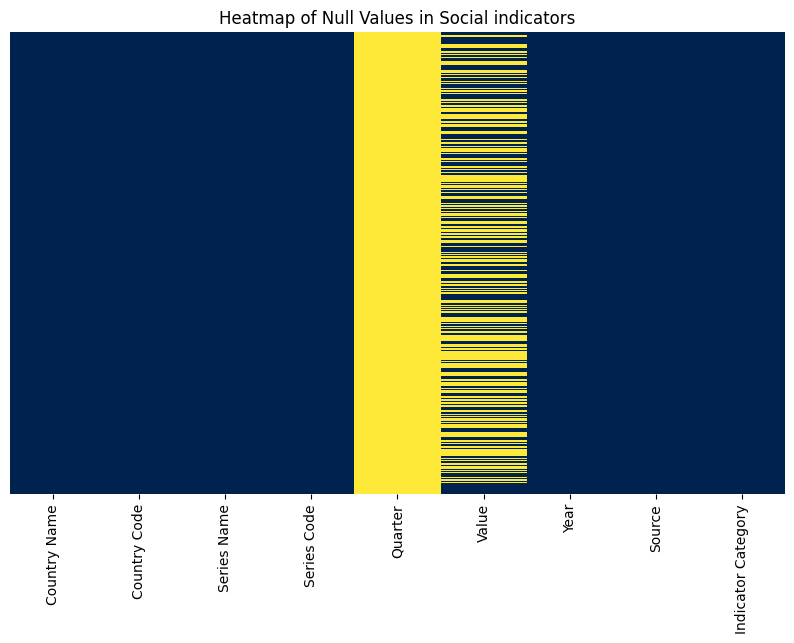

In [47]:
df_social_heat = df_social
plt.figure(figsize=(10, 6))
sns.heatmap(df_social_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("Heatmap of Null Values in Social indicators")
plt.show()

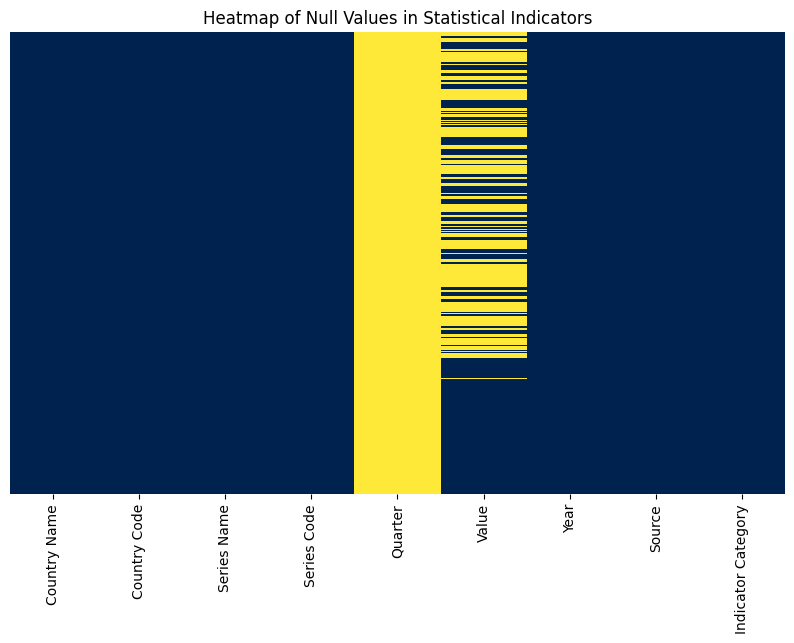

In [48]:
df_statistical_heat = df_statistical
plt.figure(figsize=(10, 6))
sns.heatmap(df_statistical_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("Heatmap of Null Values in Statistical Indicators")
plt.show()

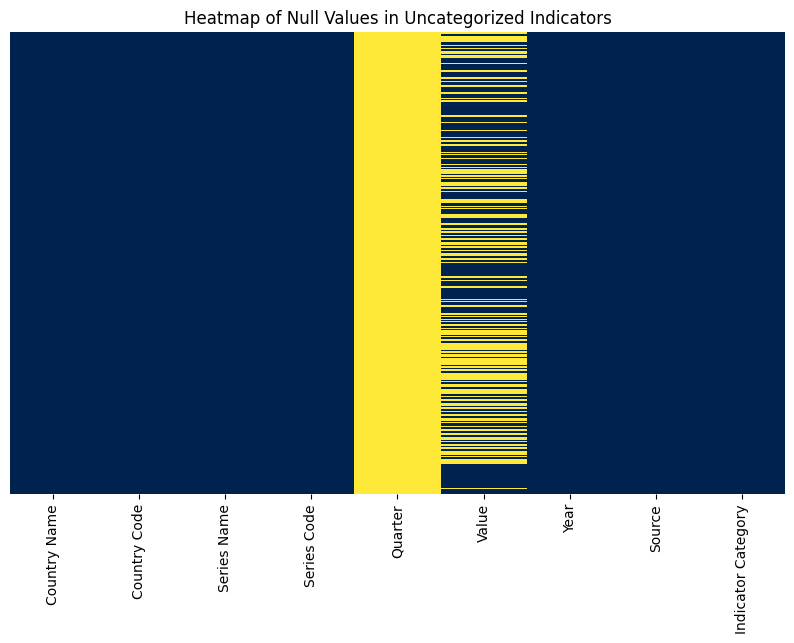

In [49]:
df_uncategorized_heat = df_uncategorized
plt.figure(figsize=(10, 6))
sns.heatmap(df_uncategorized_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("Heatmap of Null Values in Uncategorized Indicators")
plt.show()

In [50]:
df_economical['Quarter'] = df_economical['Quarter'].fillna('Annual')

In [51]:
missing_values = df_economical.isnull().sum()
print(missing_values)
df_economical.shape

Country Name               0
Country Code               0
Series Name                0
Series Code                0
Quarter                    0
Value                 399352
Year                       0
Source                     0
Indicator Category         0
dtype: int64


(632502, 9)

In [52]:
country_counts = df_economical.groupby('Country Name').size().sort_values(ascending=False)
print(country_counts.head(10))

Country Name
Albania                   5967
Argentina                 5967
Armenia                   5967
Australia                 5967
Austria                   5967
Bangladesh                5967
Barbados                  5967
Belgium                   5967
Bolivia                   5967
Bosnia and Herzegovina    5967
dtype: int64


In [53]:
missing_summary = df_economical.groupby('Country Name')['Value'].apply(
    lambda x: f"{x.notna().sum()} present / {x.isna().sum()} missing"
)
print(missing_summary.head(106))

Country Name
Albania           2722 present / 3245 missing
Argentina         1462 present / 4505 missing
Armenia           1876 present / 4091 missing
Australia         3595 present / 2372 missing
Austria           2957 present / 3010 missing
                             ...             
Turkiye           2849 present / 3118 missing
Uganda            2643 present / 3324 missing
United Kingdom    3980 present / 1987 missing
United States     2269 present / 3698 missing
Uruguay           1803 present / 4164 missing
Name: Value, Length: 106, dtype: object


In [54]:
missing_percentage = df_economical.groupby('Country Name')['Value'].apply(
    lambda x: x.isna().mean() * 100
).sort_values(ascending=False)
df_missing_percentage = missing_percentage.reset_index()
df_missing_percentage.columns = ['Country Name', 'Missing Value Percentage']
pd.set_option('display.max_rows', None)
df_missing_percentage

,Country Name,Missing Value Percentage
0,Malawi,89.240825
1,Nigeria,89.106754
2,Togo,86.794034
3,Seychelles,85.805262
4,Bolivia,85.721468
5,Tanzania,84.917044
6,Maldives,83.643372
7,Papua New Guinea,83.291436
8,Timor-Leste,83.056812
9,Cambodia,81.632311


In [55]:
missing_summary_combined = df_combined.groupby('Country Name')['Value'].apply(
    lambda x: f"{x.notna().sum()} present / {x.isna().sum()} missing"
)
print(missing_summary_combined.head(106))
missing_percentage_combined = df_combined.groupby('Country Name')['Value'].apply(
    lambda x: x.isna().mean() * 100
).sort_values(ascending=False)
df_missing_percentage_combined = missing_percentage_combined.reset_index()
df_missing_percentage_combined.columns = ['Country Name', 'Missing Value Percentage']
pd.set_option('display.max_rows', None)
df_missing_percentage_combined

Country Name
Albania                   5200 present / 6311 missing
Argentina                 3475 present / 8036 missing
Armenia                   4355 present / 7156 missing
Australia                 6450 present / 5061 missing
Austria                   5103 present / 6408 missing
Bangladesh                6449 present / 5062 missing
Barbados                  2783 present / 8728 missing
Belgium                   4137 present / 7374 missing
Bolivia                   2814 present / 8697 missing
Bosnia and Herzegovina    5003 present / 6508 missing
Botswana                  3319 present / 8192 missing
Brazil                    5009 present / 6502 missing
Bulgaria                  4186 present / 7325 missing
Burkina Faso              3271 present / 8240 missing
Cambodia                  3093 present / 8418 missing
Canada                    4292 present / 7219 missing
Chile                     3236 present / 8275 missing
China                     3081 present / 8430 missing
Colombia       

,Country Name,Missing Value Percentage
0,Seychelles,81.078968
1,Malawi,80.331856
2,Nigeria,78.855008
3,Togo,77.247850
4,Maldives,76.639736
5,Papua New Guinea,76.048997
6,Tanzania,76.031622
7,Barbados,75.823126
8,Bolivia,75.553818
9,Timor-Leste,75.440883


In [56]:
missing_by_year = df_combined.groupby('Year')['Value'].apply(lambda x: x.isna().mean() * 100)
missing_by_year = missing_by_year.reset_index()
missing_by_year.columns = ['Year', 'Missing Value Percentage']
print(missing_by_year)

   Year  Missing Value Percentage
0  2021                 57.596589
1  2022                 60.694283
2  2023                 66.239594


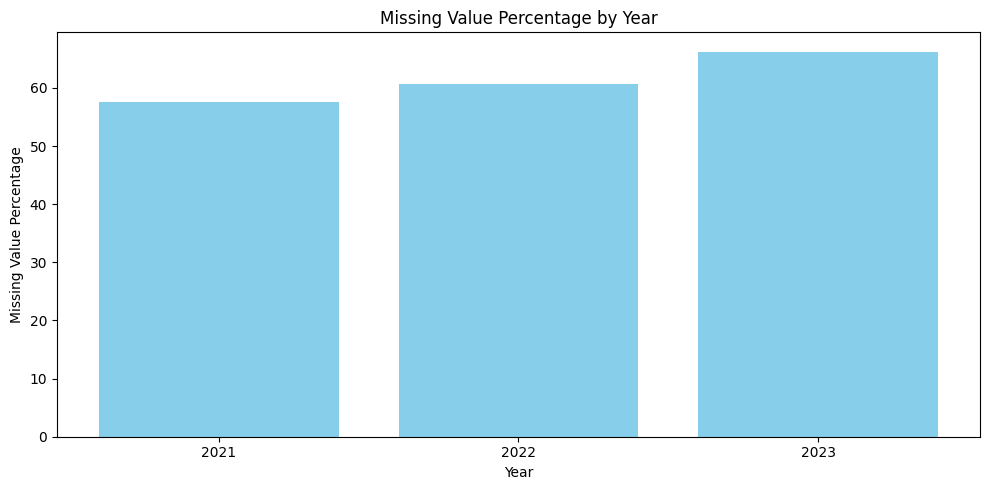

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(missing_by_year['Year'], missing_by_year['Missing Value Percentage'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Missing Value Percentage')
plt.title('Missing Value Percentage by Year')
plt.xticks(missing_by_year['Year'])
plt.tight_layout()
plt.show()

In [58]:
missing_by_source = df_combined.groupby('Source')['Value'].apply(lambda x: x.isna().mean() * 100)
missing_by_source = missing_by_source.reset_index()
missing_by_source.columns = ['Source', 'Missing Value Percentage']
print(missing_by_source)

  Source  Missing Value Percentage
0   QPSD                 73.718303
1    SPI                  0.960867
2    WDI                 46.147642


In [59]:
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

df_missing_percentage_combined['Country Code'] = df_missing_percentage_combined['Country Name'].apply(get_country_code)

df_map = df_missing_percentage_combined.dropna(subset=['Country Code'])

fig = px.choropleth(
    df_map,
    locations='Country Code',
    color='Missing Value Percentage',
    hover_name='Country Name',
    color_continuous_scale='Reds',
    title='Missing Value Percentage by Country (All Indicators)',
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


In [60]:
domain_groups = df_combined.groupby('Indicator Category')

In [61]:
countries_to_keep = df_missing_percentage_combined[df_missing_percentage_combined['Missing Value Percentage'] < 70]['Country Name'].tolist()
df_filtered = df_combined[df_combined['Country Name'].isin(countries_to_keep)]
print(f"Original data shape: {df_combined.shape}, Filtered data shape: {df_filtered.shape}")

categories = df_filtered['Indicator Category'].unique()

df_imputed = pd.DataFrame()

# Loop through each category and apply appropriate imputation
for category in categories:
    print(f"Processing category: {category}")
    category_data = df_filtered[df_filtered['Indicator Category'] == category].copy()
    country_missing_pct = category_data.groupby('Country Name')['Value'].apply(
        lambda x: x.isna().mean() * 100
    )
    medium_missing_countries = country_missing_pct[
        (country_missing_pct >= 40) & (country_missing_pct < 70)
    ].index.tolist()
    low_missing_countries = country_missing_pct[country_missing_pct < 40].index.tolist()

    # Process each Series Name separately
    for series_name in category_data['Series Name'].unique():
        try:
            series_data = category_data[category_data['Series Name'] == series_name].copy()

            if len(series_data) > 10:
                pivot = series_data.pivot_table(
                    index='Country Name',
                    columns='Year',
                    values='Value'
                )

                if pivot.shape[0] <= 1 or pivot.shape[1] <= 1:
                    df_imputed = pd.concat([df_imputed, series_data], ignore_index=True)
                    continue

                # Impute missing values based on country missingness level
                imputed_pivot = pivot.copy()

                # For countries with 40-70% missing data:
                medium_missing_in_pivot = [c for c in medium_missing_countries if c in pivot.index]
                if len(medium_missing_in_pivot) > 0:
                    # Time-based interpolation
                    for country in medium_missing_in_pivot:
                        try:
                            imputed_pivot.loc[country] = pivot.loc[country].interpolate(
                                method='linear', limit_direction='both'
                            )
                        except Exception as e:
                            print(f"Interpolation error for {country}, series {series_name}: {e}")

                    # Fill remaining with mean imputation of similar countries
                    for year in imputed_pivot.columns:
                        if imputed_pivot[year].isna().any():
                            year_mean = imputed_pivot[year].mean()
                            if pd.notna(year_mean):
                                imputed_pivot[year] = imputed_pivot[year].fillna(year_mean)

                # For countries with <40% missing data:
                low_missing_in_pivot = [c for c in low_missing_countries if c in pivot.index]
                if len(low_missing_in_pivot) >= 3:
                    low_missing_pivot = pivot.loc[low_missing_in_pivot]

                    # Check if we have enough non-NaN values and consistent shapes
                    if (low_missing_pivot.shape[0] >= 3 and low_missing_pivot.shape[1] >= 2 and
                        low_missing_pivot.count().min() > 1 and
                        not low_missing_pivot.isna().all().any()):

                        # First fill any completely empty columns with mean
                        for col in low_missing_pivot.columns:
                            if low_missing_pivot[col].isna().all():
                                low_missing_pivot[col] = low_missing_pivot.mean(axis=1).mean()

                        # Apply KNN imputation
                        try:
                            knn_imputer = KNNImputer(n_neighbors=min(3, low_missing_pivot.shape[0]-1))
                            imputed_values = knn_imputer.fit_transform(low_missing_pivot)

                            if imputed_values.shape == (low_missing_pivot.shape[0], low_missing_pivot.shape[1]):
                                imputed_low_missing = pd.DataFrame(
                                    imputed_values,
                                    index=low_missing_pivot.index,
                                    columns=low_missing_pivot.columns
                                )

                                # Update the imputed pivot with KNN results
                                for country in imputed_low_missing.index:
                                    imputed_pivot.loc[country] = imputed_low_missing.loc[country]
                            else:
                                print(f"Shape mismatch for {series_name}: {imputed_values.shape} vs {low_missing_pivot.shape}")
                        except Exception as e:
                            print(f"KNN imputation error for series {series_name}: {e}")

                imputed_pivot = imputed_pivot.fillna(imputed_pivot.mean().mean())

                imputed_long = imputed_pivot.reset_index().melt(
                    id_vars='Country Name',
                    var_name='Year',
                    value_name='Imputed Value'
                )

                series_imputed = series_data.merge(
                    imputed_long,
                    on=['Country Name', 'Year'],
                    how='left'
                )

                series_imputed['Value'] = np.where(
                    series_imputed['Value'].isna(),
                    series_imputed['Imputed Value'],
                    series_imputed['Value']
                )

                series_imputed = series_imputed.drop('Imputed Value', axis=1)

                df_imputed = pd.concat([df_imputed, series_imputed], ignore_index=True)
            else:
                df_imputed = pd.concat([df_imputed, series_data], ignore_index=True)

        except Exception as e:
            print(f"Error processing series {series_name}: {e}")
            series_data = category_data[category_data['Series Name'] == series_name].copy()
            df_imputed = pd.concat([df_imputed, series_data], ignore_index=True)

# This is a simpler approach than the iterative imputer and more robust
print("Applying simple mean imputation for any remaining missing values...")

series_year_means = df_imputed.groupby(['Series Name', 'Year'])['Value'].transform('mean')
df_imputed['Value'] = df_imputed['Value'].fillna(series_year_means)

# If still missing values, try just series means
if df_imputed['Value'].isna().any():
    series_means = df_imputed.groupby('Series Name')['Value'].transform('mean')
    df_imputed['Value'] = df_imputed['Value'].fillna(series_means)

# Calculate imputation statistics
original_missing = df_filtered['Value'].isna().sum()
final_missing = df_imputed['Value'].isna().sum()
imputed_count = original_missing - final_missing

print(f"Original missing values: {original_missing}")
print(f"Values imputed: {imputed_count}")
print(f"Remaining missing values: {final_missing}")
print(f"Imputation percentage: {imputed_count/original_missing*100:.2f}%")

df_imputed.to_csv('imputed_data_less_than_70_missing.csv', index=False)

df_imputed['Imputed'] = 'No'

df_filtered['match_key'] = df_filtered['Country Name'] + '_' + df_filtered['Series Name'] + '_' + df_filtered['Year'].astype(str)
df_imputed['match_key'] = df_imputed['Country Name'] + '_' + df_imputed['Series Name'] + '_' + df_imputed['Year'].astype(str)

filtered_missing_keys = df_filtered[df_filtered['Value'].isna()]['match_key'].unique()
df_imputed.loc[df_imputed['match_key'].isin(filtered_missing_keys), 'Imputed'] = 'Yes'

df_imputed.drop('match_key', axis=1, inplace=True)

print("\nValue ranges before imputation:")
print(df_filtered['Value'].describe())

imputed_by_country = df_imputed[df_imputed['Imputed'] == 'Yes'].groupby('Country Name').size()
total_by_country = df_imputed.groupby('Country Name').size()
imputation_ratio = (imputed_by_country / total_by_country * 100).sort_values(ascending=False)

print("\nTop 10 countries by percentage of imputed values:")
print(imputation_ratio.head(10))

Original data shape: (1220166, 9), Filtered data shape: (874836, 9)
Processing category: Financial_Indicators
Processing category: Economical_Indicators
Processing category: Public_Debt_Indicators
Processing category: Environmental_Indicators
Processing category: Social_Indicators
Processing category: Statistical_Indicators
Processing category: Uncategorized
Applying simple mean imputation for any remaining missing values...
Original missing values: 494318
Values imputed: 447122
Remaining missing values: 47196
Imputation percentage: 90.45%


<ipython-input-61-856859cd068a>:150: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Value ranges before imputation:
count    3.805180e+05
mean     1.414904e+13
std      2.968880e+14
min     -5.382066e+14
25%      3.604059e+00
50%      6.528543e+01
75%      6.493000e+09
max      2.089238e+16
Name: Value, dtype: float64

Top 10 countries by percentage of imputed values:
Country Name
Korea, Rep.    75.623317
Pakistan       70.098167
Kosovo         69.959169
Tajikistan     69.837547
Argentina      69.811485
Sri Lanka      69.437929
Fiji           69.046999
Rwanda         69.038311
Denmark        68.968812
Germany        68.630006
dtype: float64


Imputation Methods Used:
1. Filtering Strategy

Countries with more than 70% missing data are excluded entirely
This ensures that imputation only happens for countries with reasonable data coverage

2. Category-Specific Imputation

Data is processed separately by indicator category (economic resilience, social equity, financial development)
This preserves domain-specific patterns during imputation

3. Tailored Imputation Based on Missing Data Percentage
The code uses different imputation strategies depending on how much data is missing:

For countries with 40-70% missing data (moderate missingness):

Linear interpolation within each country's time series
Remaining gaps filled with mean values from similar countries


For countries with <40% missing data (low missingness):

KNN (K-Nearest Neighbors) imputation with k=3
This more sophisticated method leverages data patterns from similar countries
Used only when sufficient data exists (at least 3 countries with good data)



4. Fallback Imputation

Series-year means for any values still missing after the primary methods
Series means as a final fallback for any remaining missing values

Key Features of the Approach

Hierarchical Strategy: The code applies increasingly simpler methods as data quality decreases
Time Series Awareness: Uses temporal interpolation to maintain time trends
Error Handling: Robust error catching to prevent processing failures
Validation: Includes visualization and statistical validation of imputation results
Transparency: Adds an 'Imputed' flag to identify which values were imputed

Advantages for our Analysis
This imputation approach provides several benefits for the economic resilience, social equity, and financial development study:

It preserves relationships between indicators within each domain
It maintains country-specific patterns over time
It provides complete data for correlation analysis and composite index creation
It allows us to track which values were imputed for sensitivity analysis

In [62]:
df_imputed = pd.read_csv('imputed_data_less_than_70_missing.csv', low_memory=False)
df_filtered = pd.read_csv('/content/Combined_Indicators_Data.csv', low_memory=False)

print(f"Loaded imputed data with {len(df_imputed)} rows")
print("Creating imputation flag...")

df_filtered['match_key'] = df_filtered['Country Name'] + '_' + df_filtered['Series Name'] + '_' + df_filtered['Year'].astype(str)
df_imputed['match_key'] = df_imputed['Country Name'] + '_' + df_imputed['Series Name'] + '_' + df_imputed['Year'].astype(str)

missing_keys = set()
for idx, row in df_filtered.iterrows():
    if pd.isna(row['Value']):
        missing_keys.add(row['match_key'])
    if idx % 100000 == 0:
        print(f"Processed {idx} rows of original data")

df_imputed['Imputed'] = df_imputed['match_key'].apply(lambda x: 'Yes' if x in missing_keys else 'No')
print(f"Identified {(df_imputed['Imputed'] == 'Yes').sum()} imputed values")

df_imputed.drop('match_key', axis=1, inplace=True)

# Calculate imputation percentages by indicator category
imputed_by_category = df_imputed.groupby('Indicator Category')['Imputed'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values()

print("\nImputation percentage by indicator category:")
for category, pct in imputed_by_category.items():
    print(f"{category}: {pct:.1f}%")

# Calculate imputation percentages by year
recent_years = sorted(df_imputed['Year'].unique())[-5:]
year_imputation = df_imputed[df_imputed['Year'].isin(recent_years)].groupby('Year')['Imputed'].apply(
    lambda x: (x == 'Yes').mean() * 100
)

print("\nImputation percentage by recent years:")
for year, pct in year_imputation.items():
    print(f"{year}: {pct:.1f}%")

# Examine key economic, social, and financial indicators
key_indicators = {
    'Economic': [
        'GDP growth (annual %)',
        'Inflation, consumer prices (annual %)',
        'Unemployment, total (% of total labor force)'
    ],
    'Social': [
        'GINI index',
        'Poverty headcount ratio at national poverty lines (% of population)',
        'School enrollment, primary (% gross)'
    ],
    'Financial': [
        'Domestic credit to private sector (% of GDP)',
        'Market capitalization of listed domestic companies (% of GDP)',
        'Bank capital to assets ratio (%)'
    ]
}

print("\nImputation percentage for key indicators:")
for category, indicators in key_indicators.items():
    print(f"\n{category} Indicators:")
    for indicator in indicators:
        if indicator in df_imputed['Series Name'].unique():
            imputed_pct = (df_imputed[df_imputed['Series Name'] == indicator]['Imputed'] == 'Yes').mean() * 100
            print(f"  {indicator}: {imputed_pct:.1f}%")
        else:
            print(f"  {indicator}: Not found in dataset")

# Calculate imputation percentages for top 10 countries
top_countries = df_imputed['Country Name'].value_counts().head(10).index
country_imputation = df_imputed[df_imputed['Country Name'].isin(top_countries)].groupby('Country Name')['Imputed'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values()

print("\nImputation percentage for top 10 countries by data volume:")
for country, pct in country_imputation.items():
    print(f"{country}: {pct:.1f}%")

# Visualize distribution of original vs imputed values for Economic indicators
print("\nCreating visualization for Economic indicators...")
if 'Economical_Indicators' in df_imputed['Indicator Category'].unique():
    econ_data = df_imputed[df_imputed['Indicator Category'] == 'Economical_Indicators']
    econ_sample = pd.concat([
        econ_data[econ_data['Imputed'] == 'No'].sample(min(5000, len(econ_data[econ_data['Imputed'] == 'No']))),
        econ_data[econ_data['Imputed'] == 'Yes'].sample(min(5000, len(econ_data[econ_data['Imputed'] == 'Yes'])))
    ])

    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=econ_sample,
        x='Value',
        hue='Imputed',
        element='step',
        stat='density',
        common_norm=False,
        bins=30
    )
    plt.title('Distribution of Original vs Imputed Values for Economic Indicators')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('economic_values_distribution.png')
    plt.close()
    print("Saved economic values distribution visualization")

summary_data = []

for category in df_imputed['Indicator Category'].unique():
    category_data = df_imputed[df_imputed['Indicator Category'] == category]
    total = len(category_data)
    imputed = (category_data['Imputed'] == 'Yes').sum()
    imputed_pct = (imputed / total) * 100 if total > 0 else 0

    summary_data.append({
        'Group Type': 'Indicator Category',
        'Group': category,
        'Total Points': total,
        'Imputed Points': imputed,
        'Imputation %': imputed_pct
    })

for year in recent_years:
    year_data = df_imputed[df_imputed['Year'] == year]
    total = len(year_data)
    imputed = (year_data['Imputed'] == 'Yes').sum()
    imputed_pct = (imputed / total) * 100 if total > 0 else 0

    summary_data.append({
        'Group Type': 'Year',
        'Group': str(year),
        'Total Points': total,
        'Imputed Points': imputed,
        'Imputation %': imputed_pct
    })

top15_countries = df_imputed['Country Name'].value_counts().head(15).index
for country in top15_countries:
    country_data = df_imputed[df_imputed['Country Name'] == country]
    total = len(country_data)
    imputed = (country_data['Imputed'] == 'Yes').sum()
    imputed_pct = (imputed / total) * 100 if total > 0 else 0

    summary_data.append({
        'Group Type': 'Country',
        'Group': country,
        'Total Points': total,
        'Imputed Points': imputed,
        'Imputation %': imputed_pct
    })

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('imputation_summary_statistics.csv', index=False)
print("\nSaved imputation summary statistics to CSV file")
print("\nAnalysis complete!")

Loaded imputed data with 874836 rows
Creating imputation flag...
Processed 0 rows of original data
Processed 100000 rows of original data
Processed 200000 rows of original data
Processed 300000 rows of original data
Processed 400000 rows of original data
Processed 500000 rows of original data
Processed 600000 rows of original data
Processed 700000 rows of original data
Processed 800000 rows of original data
Processed 900000 rows of original data
Processed 1000000 rows of original data
Processed 1100000 rows of original data
Processed 1200000 rows of original data
Identified 497344 imputed values

Imputation percentage by indicator category:
Environmental_Indicators: 39.7%
Statistical_Indicators: 43.0%
Uncategorized: 43.3%
Social_Indicators: 49.8%
Economical_Indicators: 56.6%
Financial_Indicators: 66.4%
Public_Debt_Indicators: 74.7%

Imputation percentage by recent years:
2021: 52.9%
2022: 56.0%
2023: 61.6%

Imputation percentage for key indicators:

Economic Indicators:
  GDP growth (a

In [63]:
missing_by_country = df_imputed.groupby('Country Name')['Value'].apply(lambda x: x.isna().mean() * 100)
missing_by_country = missing_by_country.reset_index()
missing_by_country.columns = ['Country Name', 'Missing Value Percentage']
missing_by_country = missing_by_country.sort_values('Missing Value Percentage', ascending=False)

print("\nTop 10 countries with highest remaining missing values:")
print(missing_by_country.head(10))


Top 10 countries with highest remaining missing values:
             Country Name  Missing Value Percentage
0                 Albania                   5.39484
1               Argentina                   5.39484
2                 Armenia                   5.39484
3               Australia                   5.39484
4                 Austria                   5.39484
5              Bangladesh                   5.39484
6                 Belgium                   5.39484
7  Bosnia and Herzegovina                   5.39484
8                  Brazil                   5.39484
9                Bulgaria                   5.39484


In [64]:
df_imputed = pd.read_csv('imputed_data_less_than_70_missing.csv', low_memory=False)

total_rows = len(df_imputed)
missing_values = df_imputed['Value'].isna().sum()
missing_percentage = (missing_values / total_rows) * 100

df_imputed.to_csv('Imputed_and_cleaned_data.csv', index=False)
print(f"Total rows in dataset: {total_rows}")
print(f"Missing values in 'Value' column: {missing_values}")
print(f"Missing value percentage: {missing_percentage:.2f}%")


Total rows in dataset: 874836
Missing values in 'Value' column: 47196
Missing value percentage: 5.39%
